<h1>Konfiguracja</h1>

<h3>Instalacja bibliotek</h3>

In [ ]:
!pip install mediapipe
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib

<h3>Funkcje pomocnicze</h3>

Importowanie i konfiguracja

In [8]:
import numpy as np
import math
import mediapipe as mp
import cv2

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

Ekstrakcja znormalizowanych punktów kluczowych

In [2]:
def normalize_results(results):
    smallestX = 1
    biggestX = 0
    smallestY = 1
    biggestY = 0
    smallestZ = 1
    biggestZ = 0
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark] if results.left_hand_landmarks else [[0,0,0] for i in range(21)]) 
    for landmark in lh:
        newX = landmark[0]
        newY = landmark[1]
        newZ = landmark[2]
        if(smallestX>newX):
            smallestX = newX 
        if(biggestX<newX):
            biggestX = newX 
        if(smallestY>newY):
            smallestY = newY 
        if(biggestY<newY):
            biggestY = newY 
        if(smallestZ>newZ):
            smallestZ = newZ 
        if(biggestZ<newZ):
            biggestZ = newZ 
        
    normalizedLandmarks = []
    for landmark in lh:
        x_norm = (landmark[0]-smallestX)/(biggestX-smallestX)
        y_norm = (landmark[1]-smallestY)/(biggestY-smallestY)
        z_norm = (landmark[2]-smallestZ)/(biggestZ-smallestZ)
        if math.isnan(x_norm):
            x_norm = 0.0
        if math.isnan(y_norm):
            y_norm = 0.0
        if math.isnan(z_norm):
            z_norm = 0.0
        normalizedLandmarks.append([x_norm,y_norm,z_norm])
    return np.array(normalizedLandmarks).flatten()

Detekcja punktów kluczowych

In [9]:
def mediapipe_cv2_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    image.flags.writeable = False           
    results = model.process(image)    
    image.flags.writeable = True      
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    return image, results

Rysowanie rozpoznanych punktów kluczowych

In [10]:
def draw_hands_landmarks(image, results):
     mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(70,200,70), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(70,70,70), thickness=2, circle_radius=2)
                             ) 
     mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(200,70,70), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(70,70,70), thickness=2, circle_radius=2)
                             ) 

<h1>Zbieranie punktów kluczowych dłoni</h1>

Importowanie oraz konfiguracja

In [11]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import math

mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

Stałe i zmienne

In [12]:
STATIC_SYMBOLS = ["1","2","3","4","5","A","B","C","E","I","L","M","N","O","P","R","S","T","U","W","Y"]
SYMBOLS_PATH = "staticSymbols"
sequence_length = 60

Tworzenie folderów dla statycznych znaków

In [13]:
for symbol in STATIC_SYMBOLS: 
    try: 
        os.makedirs(os.path.join(SYMBOLS_PATH, symbol))
    except:
        pass

Zbieranie znaków

In [ ]:
recorded_symbols = ["Y"]

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for symbol in recorded_symbols:
        for frame_num in range(sequence_length+1):
            ret, frame = cap.read()
            image, results = mediapipe_cv2_detection(frame, holistic)
            draw_hands_landmarks(image, results)

            if frame_num == 0: 
                cv2.rectangle(image, (0,440), (640, 480), (20, 20, 20), -1)
                cv2.putText(image, 'COLLECT IN: 3', (20,470),cv2.FONT_HERSHEY_TRIPLEX, 1, (35, 184, 75), 1, cv2.LINE_AA)
                cv2.putText(image, 'Sign: {}'.format(symbol), (330,465), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (250, 250, 250), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000)
                cv2.rectangle(image, (0,440), (640, 480), (20, 20, 20), -1)
                cv2.putText(image, 'COLLECT IN: 2', (20,470),cv2.FONT_HERSHEY_TRIPLEX, 1, (35, 184, 75), 1, cv2.LINE_AA)
                cv2.putText(image, 'Sign: {}'.format(symbol), (330,465), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (250, 250, 250), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000)
                cv2.rectangle(image, (0,440), (640, 480), (20, 20, 20), -1)
                cv2.putText(image, 'COLLECT IN: 1', (20,470),cv2.FONT_HERSHEY_TRIPLEX, 1, (35, 184, 75), 1, cv2.LINE_AA)
                cv2.putText(image, 'Sign: {}'.format(symbol), (330,465), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (250, 250, 250), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(1000)
                cv2.rectangle(image, (0,440), (640, 480), (20, 20, 20), -1)
                cv2.putText(image, 'GET READY', (20,470),cv2.FONT_HERSHEY_TRIPLEX, 1, (61, 223, 235), 1, cv2.LINE_AA)
                cv2.putText(image, 'Sign: {}'.format(symbol), (330,465), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (250, 250, 250), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                cv2.waitKey(500)
            else: 
                cv2.rectangle(image, (0,440), (640, 480), (20, 20, 20), -1)
                cv2.putText(image, 'COLLECTING NOW', (20,470),cv2.FONT_HERSHEY_TRIPLEX, 1, (25, 29, 250), 1, cv2.LINE_AA)
                cv2.putText(image, 'Sign: {}'.format(symbol), (330,465), cv2.FONT_HERSHEY_TRIPLEX, 0.5, (250, 250, 250), 1, cv2.LINE_AA)
                cv2.imshow('OpenCV Feed', image)
                keypoints = normalize_results(results)
                npy_path = os.path.join(SYMBOLS_PATH, symbol, str(frame_num))
                np.save(npy_path,keypoints)
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break
                    
cap.release()
cv2.destroyAllWindows()

<h1>Szkolenie modelu</h1>

Importowanie

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import TensorBoard
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

Stałe i zmienne

In [17]:
log_dir = os.path.join('StaticLogs')
tb_callback = TensorBoard(log_dir=log_dir)

label_map = {label:num for num, label in enumerate(STATIC_SYMBOLS)}
print(label_map)

{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, 'A': 5, 'B': 6, 'C': 7, 'E': 8, 'I': 9, 'L': 10, 'M': 11, 'N': 12, 'O': 13, 'P': 14, 'R': 15, 'S': 16, 'T': 17, 'U': 18, 'W': 19, 'Y': 20}


Wczytanie danych z tablic

In [19]:
posibilities, labels = [], []
for symbol in STATIC_SYMBOLS:
    for frame_num in range(1,sequence_length+1):
        res = np.load(os.path.join(SYMBOLS_PATH, symbol, "{}.npy".format(str(frame_num))))
        posibilities.append(res)
        labels.append(label_map[symbol])

Przygotowanie i podział na zbiory 

In [20]:
X = np.array(posibilities)
y = to_categorical(labels).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1)

print("X shape: ")
print(X.shape)
print("y shape: ")
print(y.shape)
print("x_test shape: ")
print(X_test.shape)
print("y_test shape: ")
print(y_test.shape)

X shape: 
(1260, 63)
y shape: 
(1260, 21)
x_test shape: 
(126, 63)
y_test shape: 
(126, 21)


Inicjalizacja i szkolenie modelu

In [ ]:
model = Sequential()
model.add(Dense(32,input_dim=63,activation='sigmoid'))
model.add(Dense(64,activation='relu'))
model.add(Dense(np.array(STATIC_SYMBOLS).shape[0], activation='softmax'))
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback],validation_split=0.1)

Zapisanie modelu i prezentacja podsumowania

In [22]:
model.save('models/PJM_left_hand_v3.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                2048      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 21)                1365      
                                                                 
Total params: 5,525
Trainable params: 5,525
Non-trainable params: 0
_________________________________________________________________


Wczytywanie modelu

In [23]:
from keras.models import load_model

In [24]:
model = load_model('models/PJM_left_hand_v3.h5')

<h1> Dokładność i macierze błędów </h1>

Importowanie z bibliotek

In [25]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

Obliczanie wyników

In [26]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
confusion_mtrx = confusion_matrix(ytrue,yhat)
accuracy = accuracy_score(ytrue, yhat)

Dokładność modelu matematycznego

In [27]:
print("Model accuracy: ")
print(accuracy)

Model accuracy: 
1.0


Macierz błędów dla wszystkich statycznych znaków

<Axes: >

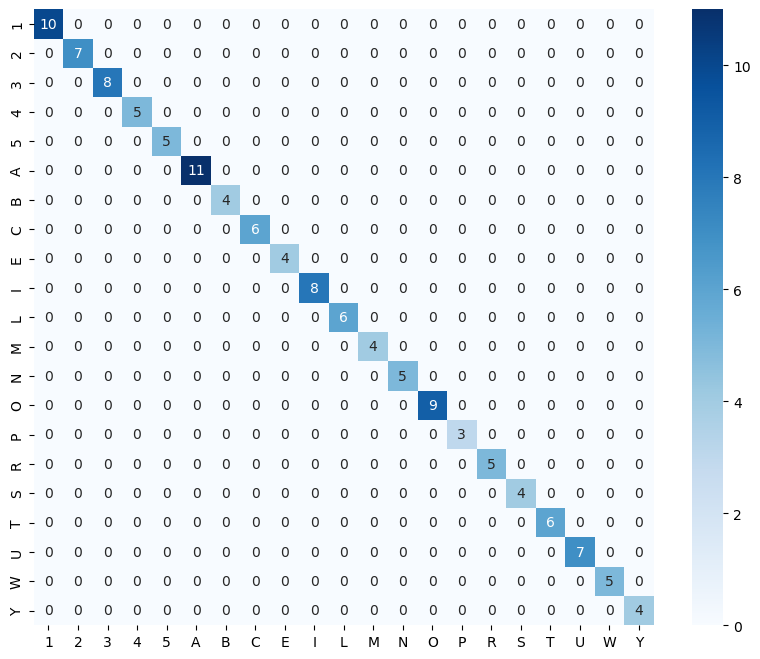

In [28]:
array = confusion_mtrx
df_cm = pd.DataFrame(array, index = [i for i in STATIC_SYMBOLS],
                  columns = [i for i in STATIC_SYMBOLS])
plt.figure(figsize = (10,8))
sn.heatmap(df_cm, annot=True,cmap=plt.cm.Blues)